In [2]:
import numpy as np
import re
#import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

https://www.vipinajayakumar.com/parsing-text-with-python/

In [3]:
def NumberFromStrings(string):
    numberfromstring = re.findall(r'-?\d+',string)
    return numberfromstring

def Number2value(x):
    if len(x) == 2 :
        digit = len(str(x[1]))
        unit = float(x[0])
        #unit = x[0]
        dicimal = float(x[1])
        #dicimal = x[1]
        value = unit + dicimal / (10**digit)
        
    elif len(x) == 3 :
        digit = len(str(x[1]))
        unit = float(x[0])
        #unit = x[0]
        dicimal = float(x[1])
        #dicimal = x[1]
        exp = float(x[2])
        #exp = x[2]
        value = (unit + dicimal / (10**digit)) * 10**exp
    return value

In [4]:
#extract dominant contribution
def domin_contri_setting(_list):
    value_list = NumberFromStrings(_list)
    occ_orbital = int(value_list[0])
    
    if float(value_list[1]) < 0 :
        occ_energy =  float(value_list[1]) - float(value_list[2]) / 100
    else:
        occ_energy = float(value_list[1]) + float(value_list[2]) / 100 
    
    virt_obital = int(value_list[3])
    if float(value_list[4]) < 0 :
        virt_energy =  float(value_list[4]) - float(value_list[5]) / 100
    else:
        virt_energy = float(value_list[4]) + float(value_list[5]) / 100 
    
    each_coeff = float(value_list[-1]) * 0.1 + float(value_list[-2])
    return occ_orbital, occ_energy, virt_obital, virt_energy, each_coeff

def domin_contri(filedata, _th):
    occ_orbital_list = np.array([])
    occ_energy_list = np.array([])
    virt_obital_list = np.array([])
    virt_energy_list = np.array([])
    coeff_list = np.array([])
    CO_ = [i for i, e in enumerate(filedata) if e == '      occ. orbital   energy / eV   virt. orbital     energy / eV   |coeff.|^2*100\n']
    CE_ = [i for i, e in enumerate(filedata) if e == ' Change of electron number:\n']
    i_list = np.array(CE_) - np.array(CO_) - 3
    i = i_list[_th - 1]
    pointer_ = CO_[_th - 1]
    for j in range(i):
        domin_list = domin_contri_setting(filedata[pointer_+ j + 1])
        occ_orbital_list = np.append(occ_orbital_list, domin_list[0])
        occ_energy_list = np.append(occ_energy_list, domin_list[1])
        virt_obital_list = np.append(virt_obital_list, domin_list[2])
        virt_energy_list = np.append(virt_energy_list, domin_list[3])
        coeff_list = np.append(coeff_list,domin_list[4])
    return occ_orbital_list, occ_energy_list, virt_obital_list, virt_energy_list, coeff_list

In [5]:
def escf2plot(filename):
    ID = np.arange(1,61,1)
    energy = np.array([])
    strength = np.array([])
    
    with open(filename,'r') as file_object:
        line = file_object.readlines()
    matchers = [' Excitation energy / nm:','length representation:']
    matching = [s for s in line if any(xs in s for xs in matchers)]
    
    for i in range(60):
        energy_ = Number2value(NumberFromStrings(matching[3*i]))
        strength_ = Number2value(NumberFromStrings(matching[3*i+1]))
        energy = np.append(energy,energy_)
        strength = np.append(strength,strength_)
    
    plt.figure(figsize=(10,5))
    plt.bar(energy,strength,width=1)
    #plt.plot(energy,strength)
    plt.title(filename)
    plt.xlabel('Excitation energy / nm')
    plt.ylabel(' Oscillator strength:length representation')
    
    avg_strength = np.average(strength)
    idx = np.argsort(strength)
    strength = strength[idx]
    energy = energy[idx]
    ID = ID[idx]
    i = 1
    while strength[-i] > 5 * avg_strength:
        _th = ID[-i]
        print(ID[-i],"th singlet a excitation:")
        print("The energy is:", energy[-i])
        print("The oscillator strength(length representation) is:", strength[-i])
        domin_list = domin_contri(line, _th)
        print("The occ. orbital is :", domin_list[0]  ,'a')
        print("The occ. energy is :", domin_list[1]  ,'eV')
        print("The virt. orbital is :", domin_list[2]  ,'a')
        print("The virt. energy is :", domin_list[3]  ,'eV')
        print("The coeff is :", domin_list[4]  ,'%\n')
        i +=1
    
    #spectial
    #for i in range(60):
        

In [10]:
def load_exp(filename):
    with open(filename,'r') as file_object:
        line = file_object.readlines()
    Lamda = np.array([])
    Abs = np.array([])

    for i in range(len(line)):
        line_split = line[i]
        line_split = line_split.split()
        temp_Lamda = float(line_split[0])
        temp_Abs = float(line_split[1])
    
        Lamda = np.append(Lamda, temp_Lamda)
        Abs = np.append(Abs, temp_Abs)
    
    plt.figure(figsize=(10,5))
    plt.plot(Lamda,Abs)
    #plt.plot(energy,strength)
    plt.title(filename)
    plt.xlabel('Excitation energy / nm')
    plt.ylabel(' Oscillator strength:length representation')
    plt.xlim(200,500)

25 th singlet a excitation:
The energy is: 167.8281686517415
The oscillator strength(length representation) is: 1.002680747093353
The occ. orbital is : [51. 48.] a
The occ. energy is : [-9.01 -9.53] eV
The virt. orbital is : [57. 56.] a
The virt. energy is : [0.59 0.  ] eV
The coeff is : [56.8 39. ] %

12 th singlet a excitation:
The energy is: 212.3712927634158
The oscillator strength(length representation) is: 0.9023456043824796
The occ. orbital is : [52. 53.] a
The occ. energy is : [-8.97 -7.14] eV
The virt. orbital is : [55. 54.] a
The virt. energy is : [-1.1  -1.53] eV
The coeff is : [89.3  4.7] %

21 th singlet a excitation:
The energy is: 180.4255849576467
The oscillator strength(length representation) is: 0.7406481863723697
The occ. orbital is : [51.] a
The occ. energy is : [-9.01] eV
The virt. orbital is : [56.] a
The virt. energy is : [0.] eV
The coeff is : [91.1] %

2 th singlet a excitation:
The energy is: 315.4065872246264
The oscillator strength(length representation) is:

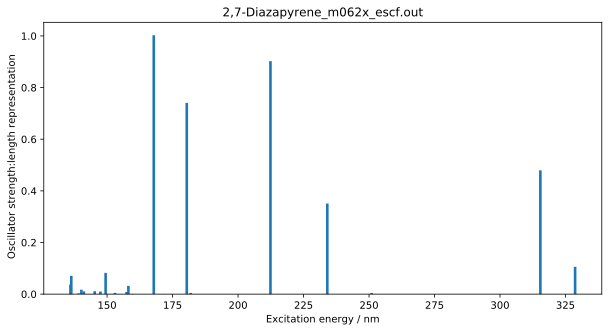

In [7]:
escf2plot('2,7-Diazapyrene_m062x_escf.out')

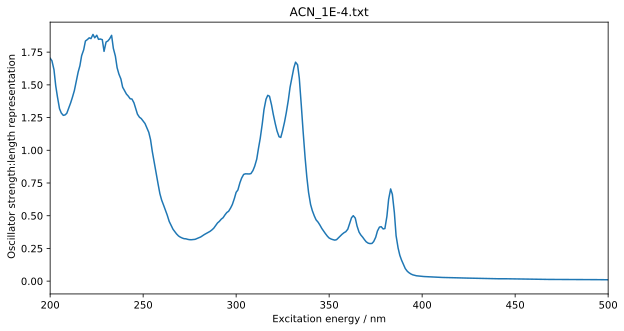

In [11]:
load_exp('ACN_1E-4.txt')

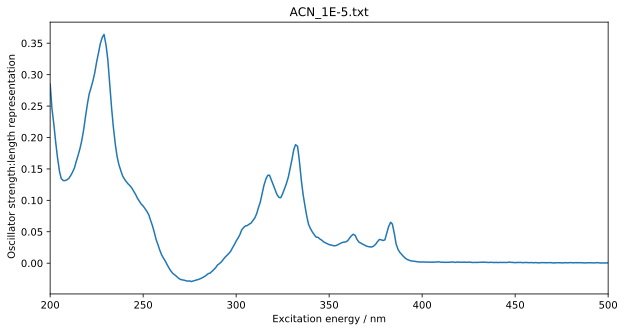

In [12]:
load_exp('ACN_1E-5.txt')

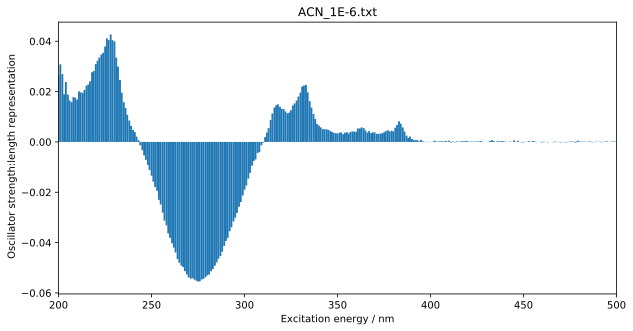

In [26]:
load_exp('ACN_1E-6.txt')

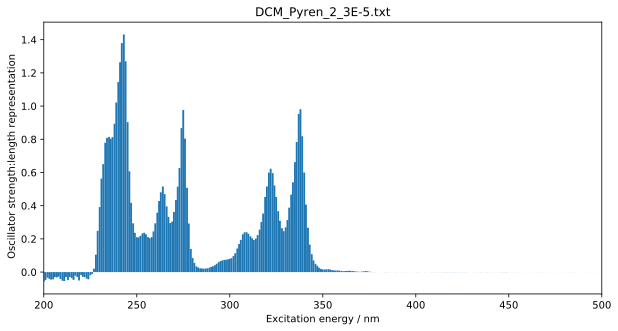

In [27]:
load_exp('DCM_Pyren_2_3E-5.txt')

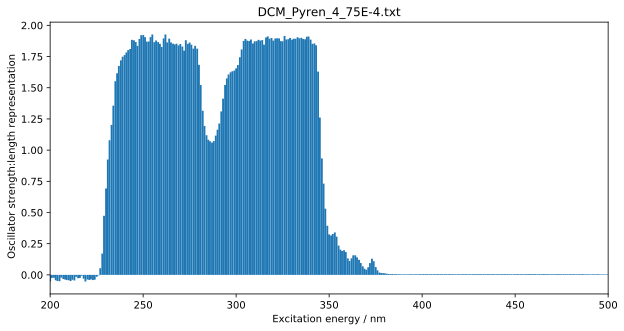

In [28]:
load_exp('DCM_Pyren_4_75E-4.txt')